In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/train.csv
/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
training_set = pd.read_csv("/kaggle/input/summeranalytics2020/train.csv")
testing_set = pd.read_csv("/kaggle/input/summeranalytics2020/test.csv")
sample = pd.read_csv("/kaggle/input/summeranalytics2020/Sample_submission.csv")
training_set.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [3]:
training_set.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [4]:
#Checking Missing Values
cols_with_missing = [col for col in training_set.columns if training_set[col].isnull().any()]
print(cols_with_missing)

[]


In [5]:
training_set.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [6]:
#Checking for Categorical_Variables
s = (training_set.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


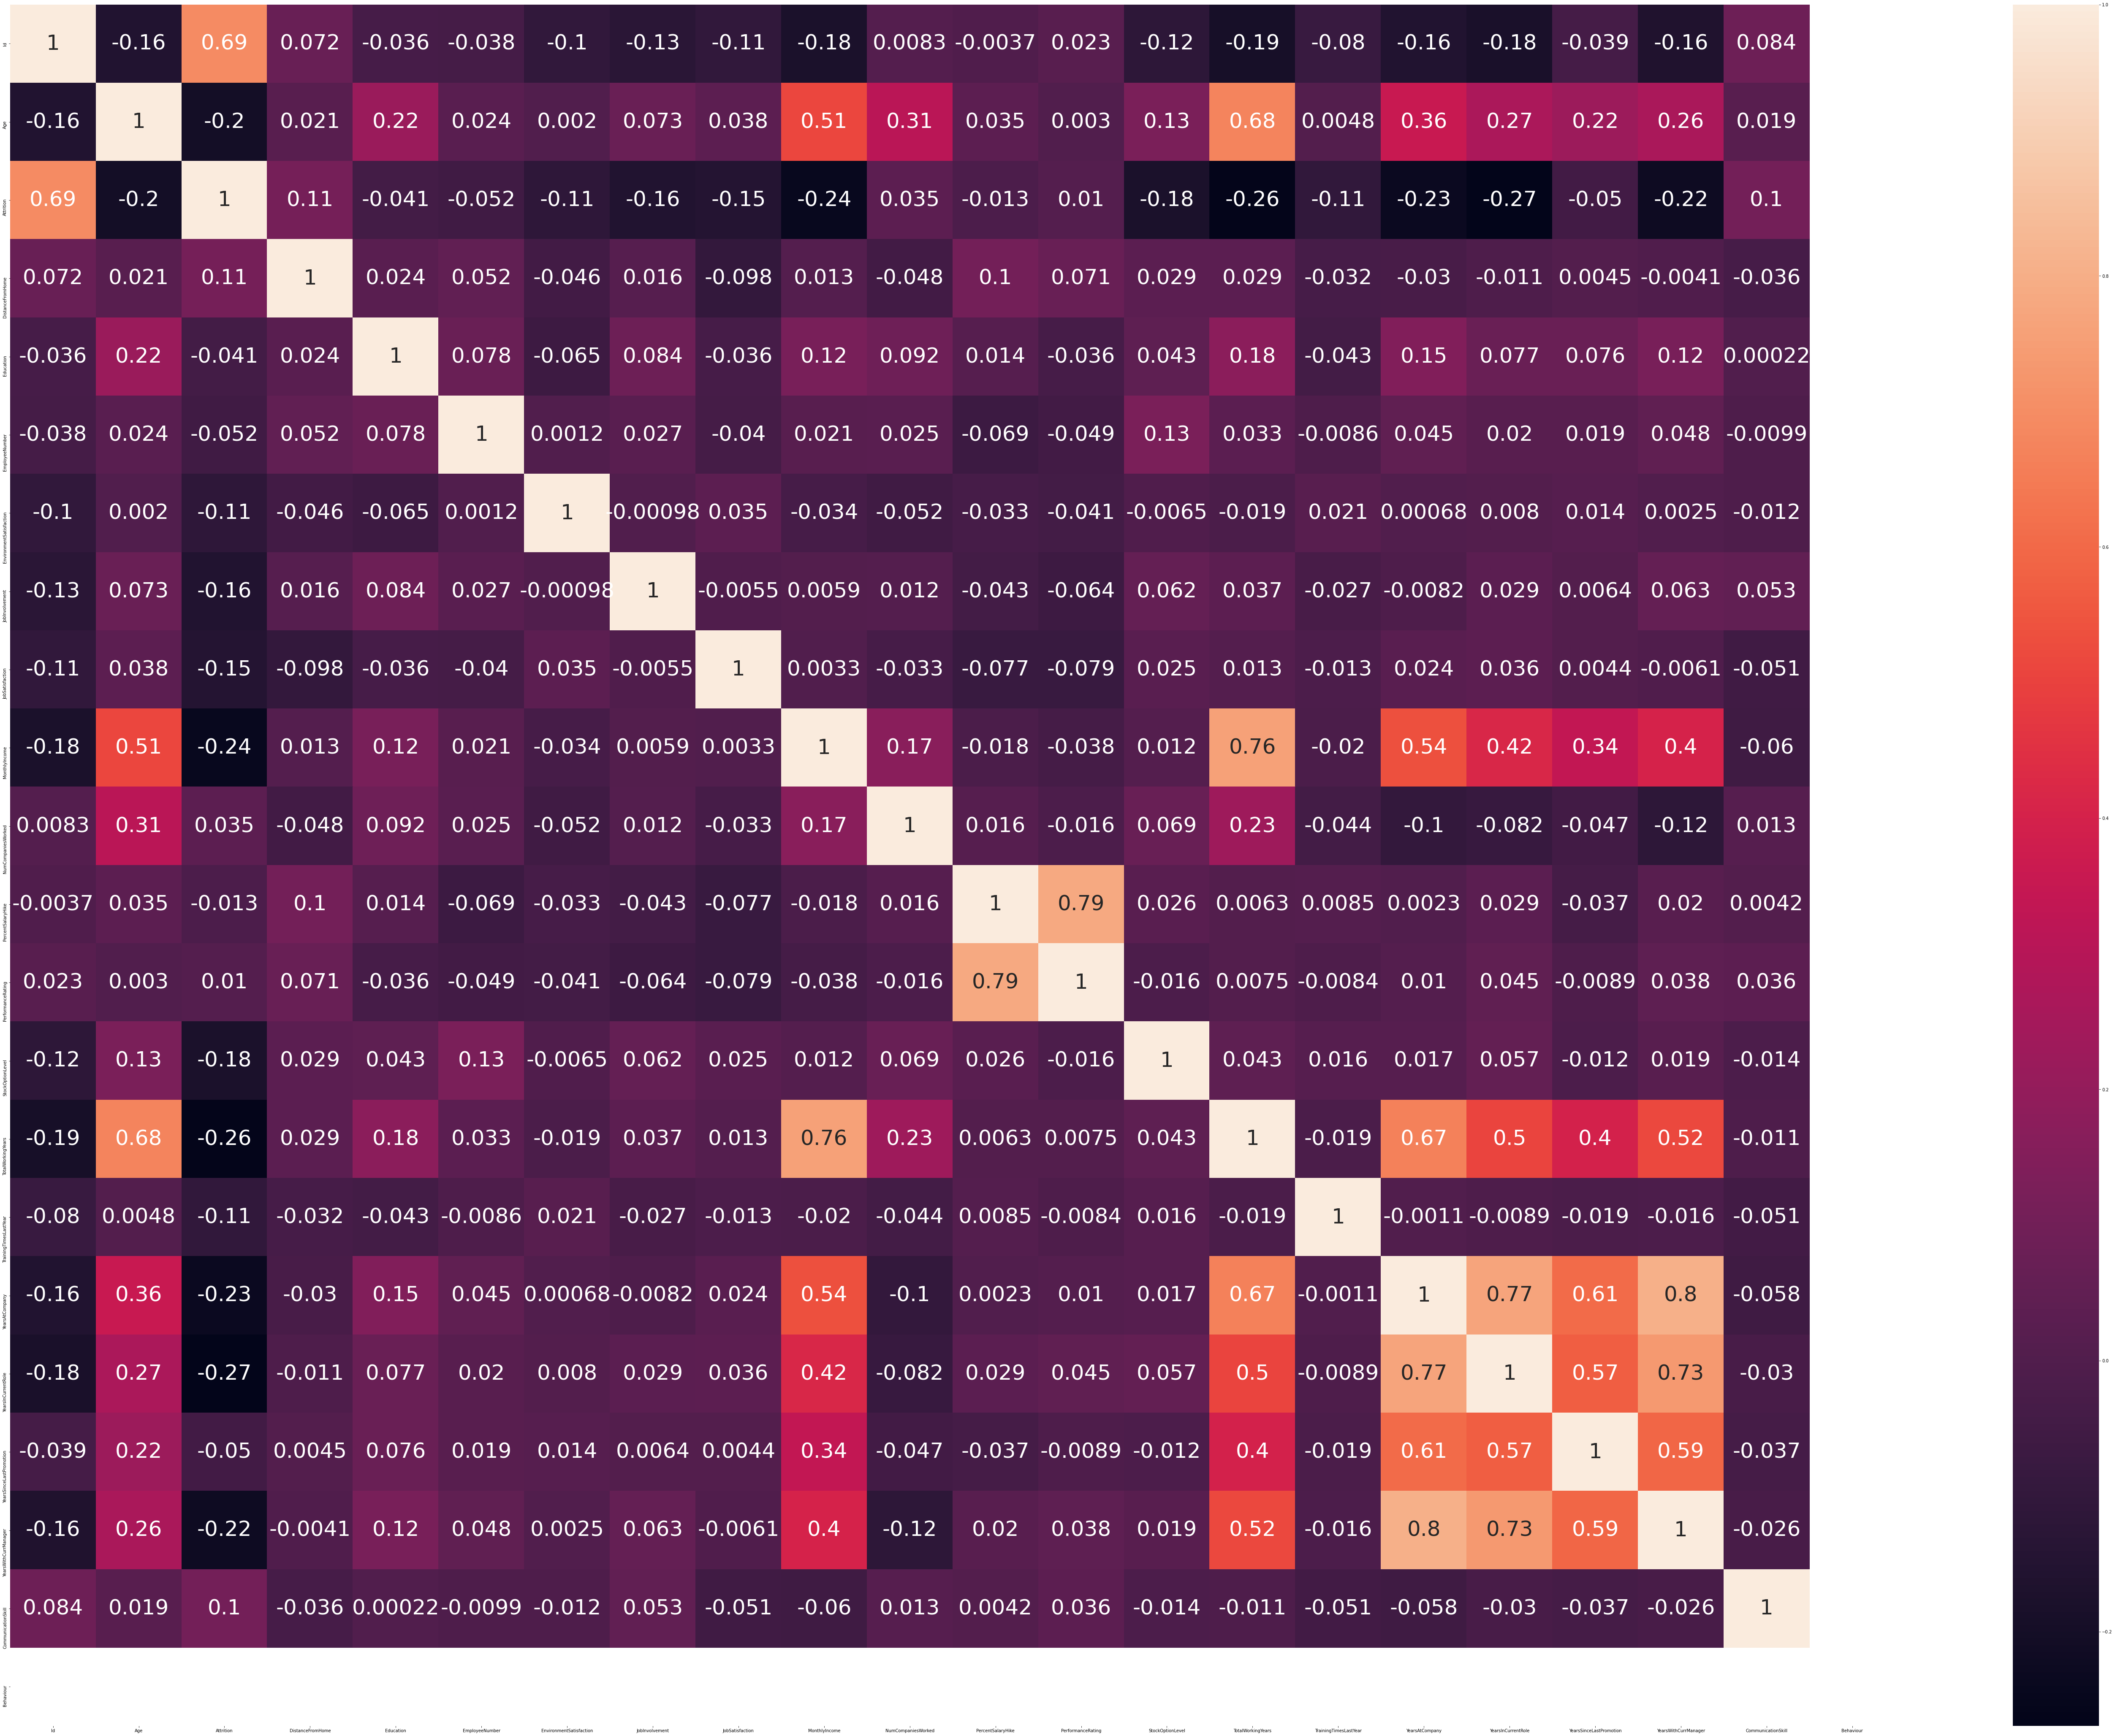

In [7]:
#Data Visualization
plt.figure(figsize=(100,75))
cor = training_set.corr()
sns.heatmap(cor,annot=True,annot_kws={"size": 50})

In [8]:
from sklearn.preprocessing import LabelEncoder
for col in training_set.columns:
        if (training_set[col].dtypes == 'object'):
            training_set[col] = LabelEncoder().fit_transform(training_set[col])
for col in testing_set.columns:
        if (testing_set[col].dtypes == 'object'):
            testing_set[col] = LabelEncoder().fit_transform(testing_set[col])

In [9]:
X_train = training_set.drop(['Attrition','Id','Behaviour'],axis=1)
Y_train = training_set.Attrition
X_test = testing_set.drop(['Id','Behaviour'],axis=1)

In [10]:
#Model: Logistic Regression
lr = LogisticRegression(solver='liblinear',max_iter=100000000)
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
pprob=lr.predict_proba(X_test)
ss=pprob[:,1]
sample=sample.drop('Attrition',axis=1)
sample['Attrition']=ss
sample.to_csv('submission.csv',index=False) 